<a href="https://colab.research.google.com/github/ertgrulyksk/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Malicious_Websites_Analysis_Tensorflow_Classification_and_Dropout_After_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataFrame = pd.read_excel("maliciousornot.xlsx")
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [4]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [5]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

In [6]:
import matplotlib.pyplot as plt
import seaborn as sbn

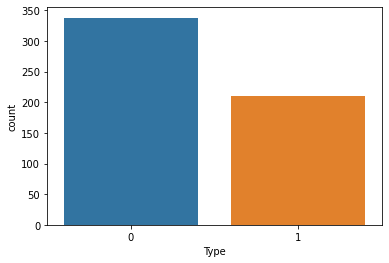

In [7]:
sbn.countplot(x="Type", data = dataFrame)

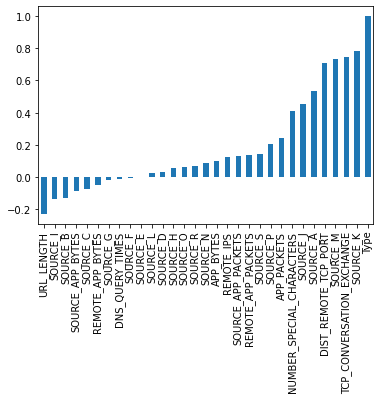

In [8]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

In [9]:
y = dataFrame["Type"].values
x = dataFrame.drop("Type",axis = 1).values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [13]:
x_train = scaler.transform(x_train)

In [14]:
x_test = scaler.transform(x_test)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
x_train.shape

(383, 30)

In [17]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [18]:
model.fit(x=x_train, y=y_train, epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 1s 15ms/step - loss: 0.6787 - val_loss: 0.6725
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6586 - val_loss: 0.6582
Epoch 3/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6349 - val_loss: 0.6349
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6028 - val_loss: 0.6014
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5594 - val_loss: 0.5668
Epoch 6/700
12/12 [==============================] - 0s 3ms/step - loss: 0.5101 - val_loss: 0.5230
Epoch 7/700
12/12 [==============================] - 0s 3ms/step - loss: 0.4540 - val_loss: 0.4752
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.3997 - val_loss: 0.4349
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.3514 - val_loss: 0.4072
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3116 - val_loss: 0.3735
Epoch 11

In [19]:
model.history.history

{'loss': [0.6786849498748779,
  0.6586217284202576,
  0.634945273399353,
  0.6028040647506714,
  0.5593812465667725,
  0.5100590586662292,
  0.4540330767631531,
  0.39965611696243286,
  0.3513857424259186,
  0.31164196133613586,
  0.2772027850151062,
  0.25072020292282104,
  0.22750860452651978,
  0.20864509046077728,
  0.1921704262495041,
  0.18196876347064972,
  0.17214344441890717,
  0.16315950453281403,
  0.15511858463287354,
  0.153096541762352,
  0.1468825787305832,
  0.1404598355293274,
  0.1313619315624237,
  0.12853579223155975,
  0.1239476129412651,
  0.11934442073106766,
  0.11538663506507874,
  0.1129307895898819,
  0.10908448696136475,
  0.1084650531411171,
  0.10456610471010208,
  0.10070468485355377,
  0.10051973164081573,
  0.09873051941394806,
  0.10004767030477524,
  0.09966696053743362,
  0.09193170070648193,
  0.09031552076339722,
  0.08810039609670639,
  0.08783984184265137,
  0.08279871940612793,
  0.08667781203985214,
  0.08059030771255493,
  0.08260990679264069,

In [20]:
modelKaybi = pd.DataFrame(model.history.history)

In [21]:
modelKaybi = pd.DataFrame(model.history.history)

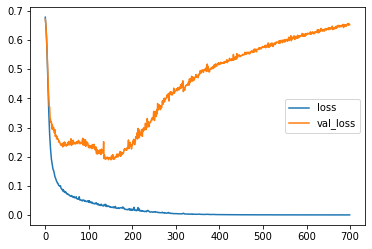

In [22]:
modelKaybi.plot()

In [23]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=15,activation = "relu"))
model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [24]:
earlyStopping = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [25]:
model.fit(x=x_train, y=y_train, epochs = 700, validation_data = (x_test,y_test), verbose = 1, callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 12ms/step - loss: 0.6887 - val_loss: 0.6796
Epoch 2/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6704 - val_loss: 0.6708
Epoch 3/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6520 - val_loss: 0.6594
Epoch 4/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6289 - val_loss: 0.6401
Epoch 5/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5975 - val_loss: 0.6140
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5606 - val_loss: 0.5875
Epoch 7/700
12/12 [==============================] - 0s 4ms/step - loss: 0.5158 - val_loss: 0.5459
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.4718 - val_loss: 0.5115
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.4258 - val_loss: 0.4676
Epoch 10/700
12/12 [==============================] - 0s 3ms/step - loss: 0.3803 - val_loss: 0.4301
Epoch 11

In [26]:
modelKaybi = pd.DataFrame(model.history.history)

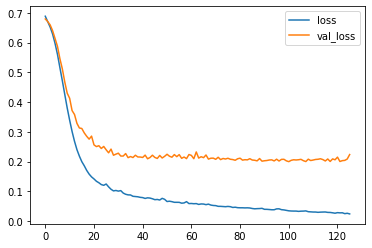

In [27]:
modelKaybi.plot()

In [28]:
model = Sequential()

model.add(Dense(units=30,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation = "sigmoid"))

model.compile(loss="binary_crossentropy",optimizer = "adam")

In [29]:
model.fit(x=x_train, y=y_train, epochs = 700, validation_data = (x_test,y_test), verbose = 1, callbacks=[earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 20ms/step - loss: 0.7228 - val_loss: 0.6981
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6984 - val_loss: 0.6957
Epoch 3/700
12/12 [==============================] - 0s 4ms/step - loss: 0.7097 - val_loss: 0.6940
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6902 - val_loss: 0.6927
Epoch 5/700
12/12 [==============================] - 0s 3ms/step - loss: 0.6928 - val_loss: 0.6907
Epoch 6/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6817 - val_loss: 0.6888
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6829 - val_loss: 0.6866
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6773 - val_loss: 0.6838
Epoch 9/700
12/12 [==============================] - 0s 4ms/step - loss: 0.6754 - val_loss: 0.6802
Epoch 10/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6774 - val_loss: 0.6769
Epoch 11

In [30]:
kayipDf = pd.DataFrame(model.history.history)

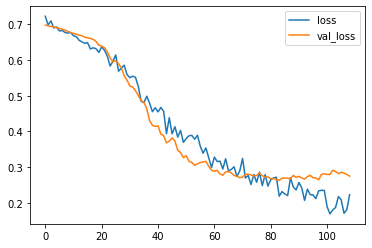

In [31]:
kayipDf.plot()

In [32]:
from tensorflow import keras
print(keras.__version__)

2.9.0


In [33]:
tahminlerimiz = model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [34]:
tahminlerimiz

array([[1.50663697e-03],
       [9.99850214e-01],
       [1.82206277e-02],
       [9.99141395e-01],
       [4.84917499e-03],
       [9.76902664e-01],
       [2.34420877e-02],
       [1.31704450e-01],
       [9.57144380e-01],
       [3.17857899e-02],
       [4.42755036e-02],
       [1.67506605e-01],
       [1.21911033e-03],
       [3.49660590e-02],
       [9.99604702e-01],
       [9.36183393e-01],
       [6.32395176e-03],
       [7.66265213e-01],
       [4.71927635e-02],
       [8.97571802e-01],
       [9.69373226e-01],
       [2.20846478e-02],
       [9.84863460e-01],
       [4.67406303e-01],
       [9.99903262e-01],
       [9.48419094e-01],
       [9.98862922e-01],
       [1.63372457e-02],
       [4.27501276e-03],
       [9.99706864e-01],
       [4.62295562e-02],
       [8.51688907e-04],
       [9.38603520e-01],
       [9.99198139e-01],
       [1.92285515e-02],
       [2.05268827e-03],
       [4.68166977e-01],
       [3.81010883e-02],
       [3.26788537e-02],
       [7.69361258e-01],
